In [1]:
from langgraph.graph import StateGraph
from typing import TypedDict ,  List, Dict, Any

In [2]:
class AgentState(TypedDict):
    values : List[int]
    result : str
    name : str

In [8]:
def process_value(state : AgentState) -> AgentState:
    """
    A node that processes multiple diff inputs
    """
    print(state)
    state['result'] = f"Hello {state['name']}, the sum of your values is {sum(state['values'])}!"
    print(state)
    return state

In [9]:
graph = StateGraph(AgentState)

graph.add_node('process_value', process_value) 
graph.set_entry_point("process_value")
graph.set_finish_point("process_value")
app = graph.compile()

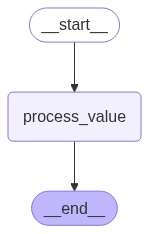

In [10]:
from IPython.display import display, HTML, Image
draw_mermaid_png = app.get_graph().draw_mermaid_png
display(Image(draw_mermaid_png())) #Display the graph as a mermaid diagram

In [16]:
result = app.invoke({"values": [1, 2, 3], "name": "Alice"}) #Invoke the app with a list of values and a name


result['result'] #Display the result message
# The output should be: "Hello Alice, the sum of your values is 6!"

{'values': [1, 2, 3], 'name': 'Alice'}
{'values': [1, 2, 3], 'name': 'Alice', 'result': 'Hello Alice, the sum of your values is 6!'}


'Hello Alice, the sum of your values is 6!'

In [15]:
print(result)  # Display the result for verification

{'values': [1, 2, 3], 'result': 'Hello Alice, the sum of your values is 6!', 'name': 'Alice'}
